In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import seaborn as sns

plt.rc("font", size=23)

In [2]:
pickle_directory = "pickle_jar/"
num_neurons = 60
gs_array = np.arange(10, 40)
percentage_inhibition = 0.0

In [12]:
def heatmap_bursting(network):
    color_list = ["black", "red", "blue"]
    spread_color_list = ["black", "red", "blue"]
    marker_color_list = ["black", "red", "blue"]
    marker_shape = ["o", "^", "s"]
    labels_list = []

    cv_for_all_networks = []
    for file in os.listdir(pickle_directory):
        if "cv" in file and f"_{network}_" in file:
            print(file)
            with open(f"{pickle_directory}{file}", "rb") as f:
                cv_for_all_networks.append(pickle.load(f))
            labels_list.append(file[-7:-4])
    print(labels_list)
    cv_for_all_networks = np.array(cv_for_all_networks)
    print(cv_for_all_networks.shape)
    heatmap_array = np.mean(cv_for_all_networks, axis=2)

    # for row in range(len(heatmap_array)):
    #     for column in range(len(heatmap_array[row])):
    #         if heatmap_array[row][column] >= 0.5:
    #             heatmap_array[row][column] = 1
    #         else:
    #             heatmap_array[row][column] = 0

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_array, cmap="magma", vmin=0, vmax=1, cbar=True)
    plt.xticks(np.arange(0, 30, 2), labels=np.arange(10, 40, 2))
    plt.yticks(np.arange(0, 8) + 0.5, labels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1])
    plt.gca().invert_yaxis()
    plt.xlabel("$g_s$")
    plt.ylabel("Fraction of neurons with bursting params")
    plt.tight_layout()
    plt.savefig(f"bursting_heatmap_{network}.png")
    plt.show()

cv_mod_0.01_burst_0.0.pkl
cv_mod_0.01_burst_0.1.pkl
cv_mod_0.01_burst_0.2.pkl
cv_mod_0.01_burst_0.3.pkl
cv_mod_0.01_burst_0.4.pkl
cv_mod_0.01_burst_0.5.pkl
cv_mod_0.01_burst_0.8.pkl
cv_mod_0.01_burst_1.0.pkl
['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.8', '1.0']
(8, 30, 50)


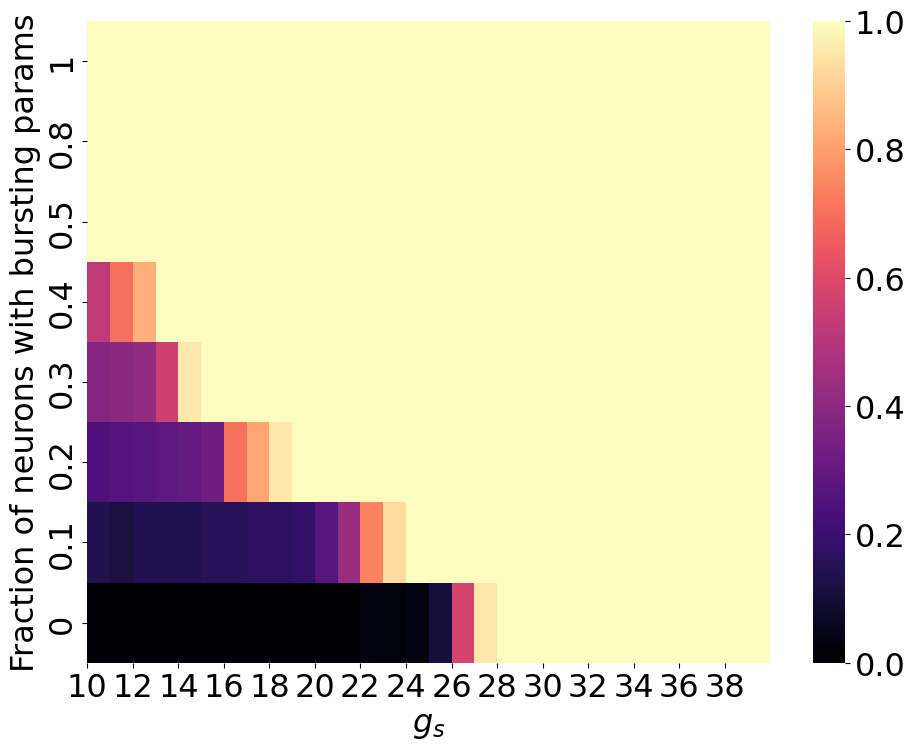

cv_mod_1_burst_0.0.pkl
cv_mod_1_burst_0.1.pkl
cv_mod_1_burst_0.2.pkl
cv_mod_1_burst_0.3.pkl
cv_mod_1_burst_0.4.pkl
cv_mod_1_burst_0.5.pkl
cv_mod_1_burst_0.8.pkl
cv_mod_1_burst_1.0.pkl
['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.8', '1.0']
(8, 30, 50)


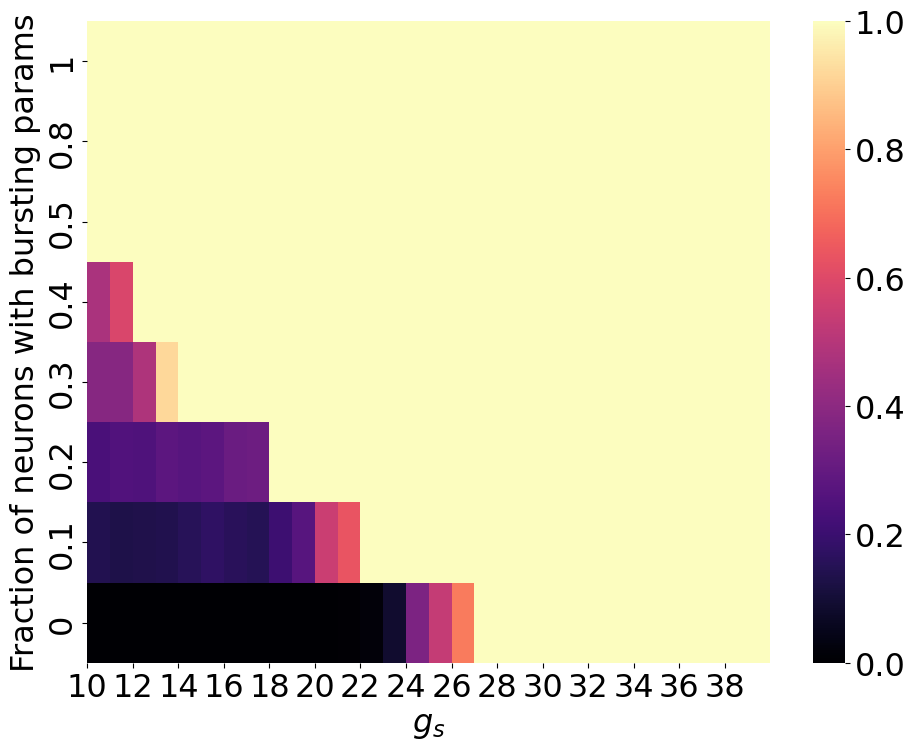

cv_mod_100_burst_0.0.pkl
cv_mod_100_burst_0.1.pkl
cv_mod_100_burst_0.2.pkl
cv_mod_100_burst_0.3.pkl
cv_mod_100_burst_0.4.pkl
cv_mod_100_burst_0.5.pkl
cv_mod_100_burst_0.8.pkl
cv_mod_100_burst_1.0.pkl
['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.8', '1.0']
(8, 30, 50)


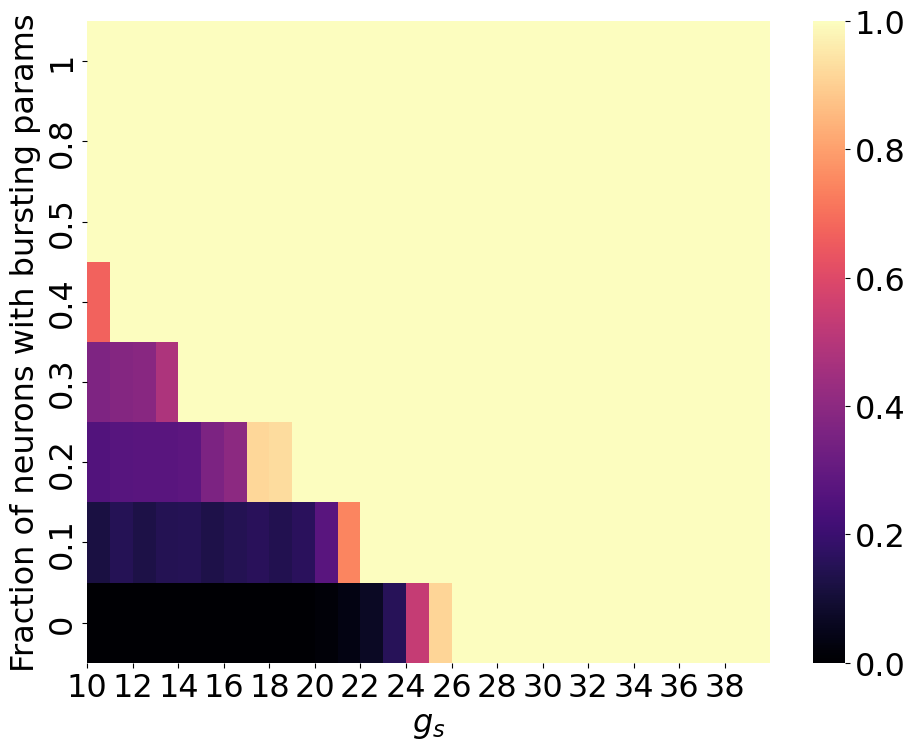

In [13]:
for network in ["0.01", "1", "100"]:
    heatmap_bursting(network)

In [5]:
def plotting_fraction(network):
    color_list = ["black", "red", "blue"]
    spread_color_list = ["black", "red", "blue"]
    marker_color_list = ["black", "red", "blue"]
    marker_shape = ["o", "^", "s"]
    labels_list = []
    cv_for_all_networks = []
    for file in os.listdir(pickle_directory):
        if "cv" in file and f"_{network}_" in file:
            print(file)
            with open(f"{pickle_directory}{file}", "rb") as f:
                cv_for_all_networks.append(pickle.load(f))
            labels_list.append(file[-7:-4])
    cv_for_all_networks = np.array(cv_for_all_networks)

    length_matrix = np.zeros((5, 30))

    for burst_index, burst in enumerate([float(x) for x in labels_list]):
        print(burst_index, burst)
        bursting_neurons = [[] for _ in range(30)]
        for index, row in enumerate(range(len(cv_for_all_networks[burst_index]))):
            for column in range(len(cv_for_all_networks[burst_index][row])):
                if cv_for_all_networks[burst_index][row][column] >= 0.5:
                    bursting_neurons[index].append(column)
                else:
                    continue

        for i in range(len(bursting_neurons)):
            length_matrix[burst_index, i] = (len(list(set(bursting_neurons[i]))) + 1)/(burst*num_neurons + 1)

    plt.figure(figsize=(10, 8))
    sns.heatmap(length_matrix, cmap="viridis", cbar_kws={'label': 'N.B/N'})
    plt.xticks(np.arange(0, 30, 2), labels=np.arange(10, 40, 2))
    plt.yticks(np.arange(0, 5) + 0.5, labels=[0, 0.2, 0.5, 0.8, 1])
    plt.gca().invert_yaxis()
    plt.xlabel("$g_s$")
    plt.ylabel("Fraction of neurons with bursting params")
    plt.tight_layout()
    plt.savefig(f"fraction_heatmap_{network}.png")
    plt.show()

In [6]:
for neurons in ["0.01", "1", "100"]:
    plotting_fraction(neurons)

cv_mod_0.01_burst_0.0.pkl
cv_mod_0.01_burst_0.1.pkl
cv_mod_0.01_burst_0.2.pkl
cv_mod_0.01_burst_0.3.pkl
cv_mod_0.01_burst_0.4.pkl
cv_mod_0.01_burst_0.5.pkl
cv_mod_0.01_burst_0.8.pkl
cv_mod_0.01_burst_1.0.pkl
0 0.0
1 0.1
2 0.2
3 0.3
4 0.4
5 0.5


IndexError: index 5 is out of bounds for axis 0 with size 5